# B2. Proba voluntaria: diferenciando materias de modalidad		


En este apartado se presenta un an√°lisis de los resultados obtenidos a partir del conjunto completo de calificaciones correspondientes a todos los estudiantes pero diferenciando las materias voluntarias.

## 1. Obtenci√≥n de los datos

Cargamos los datos desde un archivo Excel y se informa si tuvo √©xito o si ocurri√≥ alg√∫n problema (como no encontrar el archivo).

In [45]:
import pandas as pd
df = pd.read_excel('proba_voluntaria.xlsx')
display(df)

N√∫mero\nInscrici√≥n        DNI            Apelidos             Nome  \
0            4449-001  35641492W       √ÅLVAREZ GRA√ëA             ERIC   
1            4449-002  77681389Q      AMMI GUAROUACH             ZARA   
2            4449-003  77548365R       ARIAS PORTELA             JOS√â   
3            4449-005  77479961E          CABO SENRA           MART√çN   
4            4449-006  53862596T     CALVI√ëO ALMAZ√ÅN         PATRICIA   
5            4449-007  54383404L       CALVI√ëO MU√ëIZ            ERIKA   
6            4449-008  54320110K         CALVO DUR√ÅN             AD√ÅN   
7            4449-009  53863241R      CASADO MIRANDA             UX√çA   
8            4449-010  49671266Y       CASAL S√ÅNCHEZ            NURIA   
9            4449-011  77478979Y      CASTRO CANCELA            LAURA   
10           4449-012  35602573E       CASTRO CASTRO             IRIS   
11           4449-013  35630277B     CASTRO GONZ√ÅLEZ           ESTELA   
12           4449-014  77479309Z   CHAPELA FERN√ÅNDEZ           AINHOA   
13           4449-015  Y1896766Q           CININAITE           MONIKA   
14           4449-016  35641204J       COUSELO CONDE           √ÅNGELA   
15           4449-017  77974822S    EL ADRANI ABIBOU             HUDA   
16           4449-018  35634386A      FABEIRO ALONSO             AROA   
17           4449-019  77549175Y  FARAMI√ë√ÅN FERVENZA             HUGO   
18           4449-020  77549663B     FEIJO√ì GONZ√ÅLEZ             HUGO   
19           4449-021  77478950T      FREIJEIRO ARCA             ALBA   
20           4449-022  53860713A       GARC√çA BARROS           ANDR√âS   
21           4449-023  77551555V       GARC√çA BARROS            NEREA   
22           4449-024  77550779T        GARC√çA LORES           SANDRA   
23           4449-025  01849831X     GARC√çA MART√çNEZ     ACRACIA SARA   
24           4449-026  77547704F         G√ìMEZ NOVAS          CECILIA   
25           4449-027  77681570J      GONZ√ÅLEZ AROSA              ANA   
26           4449-028  77481719D     HOLGADO PI√ëEIRO              IVO   
27           4449-029  32737566X    IGLESIAS MONTERO            CELIA   
28           4449-030  77483065K         LAMAS PAZOS             EMMA   
29           4449-031  53862282P         LE√ìN MES√çAS              ANA   
30           4449-032  53864586N        L√ìPEZ JUNCAL           CARMEN   
31           4449-033  77549857K      LORENZO RIVERO             ENMA   
32           4449-034  35640279P       LOURO ESPER√ìN            DAVID   
33           4449-035  170092780         LUGO FLORES  MAR√çA ALEJANDRA   
34           4449-036  77480846X      MAIT RODR√çGUEZ            ZAIRA   
35           4449-037  77548174V      MART√çNEZ PAZOS          CLAUDIA   
36           4449-039  77543102M       MURO HILLERUD    DELIA NANDINI   
37           4449-040  54321221M       OLTRA LOURIDO          CANDELA   
38           4449-041  04680698Z       ORTIZ COLOMBO      JES√öS DAVID   
39           4449-042  77406286Q      OTERO ARAGUNDE       ROSA MAR√çA   
40           4449-043  77545876L         OTERO DUR√ÅN           ADRI√ÅN   
41           4449-044  77482659Y     PAZOS DOM√çNGUEZ        ALEJANDRO   
42           4449-045  77548397X        PE√ìN G√ÅNDARA             IAGO   
43           4449-046  77480531V         P√âREZ PENAS              MAX   
44           4449-048  78143284W       POCEIRO COUTO          ANTONIO   
45           4449-049  53862110C    PORTELA VILARI√ëO              NOA   
46           4449-050  79087187P     QUINTANA GARC√çA            MARIO   
47           4449-051  77464796Z          REY TOUR√ìN           LORENA   
48           4449-052  77972619C    RODR√çGUEZ AGUIAR             SARA   
49           4449-053  53861487H  RODR√çGUEZ GONZ√ÅLEZ           CARMEN   
50           4449-054  77465780D  RODR√çGUEZ POBLADOR            SOF√çA   
51           4449-055  35634495C   SANTAMAR√çA CASTRO            SONIA   
52           4449-056  77543157Z        TORRES CONDE             LUIS   

    Co

## 2. Preparaci√≥n de los datos

### 2.1. Identificar materias √∫nicas y n¬∫ estudiantes calificados

Obtener una lista de todas las materias √∫nicas presentes en el conjunto de datos combinado.


In [46]:
all_materias = pd.concat([df['Mat. Opt. 1'], df['Mat. Opt. 2'], df['Mat. Opt. 3']]).dropna().unique().tolist()
all_materias.sort() # Sort the list alphabetically
#print("Listado de todas las materias en las tres columnas (orden alfab√©tico):")
#print(all_materias)

In [47]:
import numpy as np
import pandas as pd

# Combinar las columnas relevantes en un solo DataFrame para el an√°lisis
df_limpio = df.melt(id_vars=['N√∫mero\nInscrici√≥n'], value_vars=['Cualif. Mat Opt. 1', 'Cualif. Mat Opt. 2', 'Cualif. Mat Opt. 3'], var_name='Materia_Opt', value_name='Calificaci√≥n')

# Mapear los nombres de las materias desde el df original bas√°ndose en la columna 'Materia_Opt' y 'N√∫mero\nInscrici√≥n'
def obtener_nombre_materia(fila):
    if fila['Materia_Opt'] == 'Cualif. Mat Opt. 1':
        return df.loc[df['N√∫mero\nInscrici√≥n'] == fila['N√∫mero\nInscrici√≥n'], 'Mat. Opt. 1'].iloc[0]
    elif fila['Materia_Opt'] == 'Cualif. Mat Opt. 2':
        return df.loc[df['N√∫mero\nInscrici√≥n'] == fila['N√∫mero\nInscrici√≥n'], 'Mat. Opt. 2'].iloc[0]
    elif fila['Materia_Opt'] == 'Cualif. Mat Opt. 3':
        return df.loc[df['N√∫mero\nInscrici√≥n'] == fila['N√∫mero\nInscrici√≥n'], 'Mat. Opt. 3'].iloc[0]
    return None

df_limpio['Materia'] = df_limpio.apply(obtener_nombre_materia, axis=1)

# Seleccionar y reordenar columnas
df_limpio = df_limpio[['N√∫mero\nInscrici√≥n', 'Materia', 'Calificaci√≥n']]

# Reemplazar "Non presentado" con NaN antes de convertir a num√©rico
df_limpio['Calificaci√≥n'] = df_limpio['Calificaci√≥n'].replace('Non presentado', np.nan)


# Convertir 'Calificaci√≥n' a num√©rico, forzando errores
df_limpio['Calificaci√≥n'] = pd.to_numeric(df_limpio['Calificaci√≥n'], errors='coerce')

# Eliminar filas donde 'Calificaci√≥n' es NaN (incluyendo las que eran 'Non presentado') o 'Materia' es NaN
df_limpio.dropna(subset=['Calificaci√≥n', 'Materia'], inplace=True)


## 3. An√°lisis estad√≠tico

In [48]:
# Generar el resumen estad√≠stico para las calificaciones por materia
resumen_por_materia = df_limpio.groupby('Materia')['Calificaci√≥n'].describe().T

# Mostrar el resumen estad√≠stico
print("Resumen estad√≠stico de calificaciones por materia:")
display(resumen_por_materia)

Resumen estad√≠stico de calificaciones por materia:


Materia   Biolox√≠a  Ciencias Xerais  Coro e T√©cnica Vocal II    Dese√±o  \
count    19.000000              1.0                      2.0  6.000000   
mean      5.947368              6.5                      9.0  4.250000   
std       2.598850              NaN                      0.0  1.635543   
min       1.500000              6.5                      9.0  2.500000   
25%       4.625000              6.5                      9.0  2.750000   
50%       6.250000              6.5                      9.0  4.250000   
75%       7.375000              6.5                      9.0  5.750000   
max      10.000000              6.5                      9.0  6.000000   

Materia  Empresa e D.M. Negocio   Franc√©s  Fundamentos Art√≠sticos    F√≠sica  \
count                  8.000000  6.000000                9.000000  4.000000   
mean                   6.312500  4.708333                5.833333  4.812500   
std                    3.242436  1.791764                1.192424  1.048312   
min                    0.000000  2.500000                4.000000  3.250000   
25%                    4.875000  3.125000                5.000000  4.750000   
50%                    6.500000  5.250000                5.750000  5.250000   
75%                    9.125000  6.062500                6.500000  5.312500   
max                    9.500000  6.500000                8.000000  5.500000   

Materia  Historia da Arte  Ingl√©s  Lat√≠n II  Matem√°ticas Ap. √°s CCSS  \
count            2.000000    1.00       1.0                13.000000   
mean             4.125000    6.25       6.0                 4.019231   
std              1.237437     NaN       NaN                 2.232482   
min              3.250000    6.25       6.0                 1.000000   
25%              3.687500    6.25       6.0                 1.750000   
50%              4.125000    6.25       6.0                 4.000000   
75%              4.562500    6.25       6.0                 6.250000   
max              5.000000    6.25       6.0                 7.500000   

Materia  Matem√°ticas II    Qu√≠mica  Tecnolox√≠a e Enxe√±ar√≠a II  Xeograf√≠a  
count          4.000000  14.000000                   4.000000   4.000000  
mean           4.687500   5.839286                   7.937500   6.375000  
std            2.383756   2.544993                   1.477258   1.361678  
min            1.500000   0.250000                   6.500000   5.250000  
25%            3.562500   5.312500                   7.250000   5.437500  
50%            5.250000   6.625000                   7.625000   6.000000  
75%            6.375000   7.500000                   8.312500   6.937500  
max            6.750000   8.500000                  10.000000   8.250000

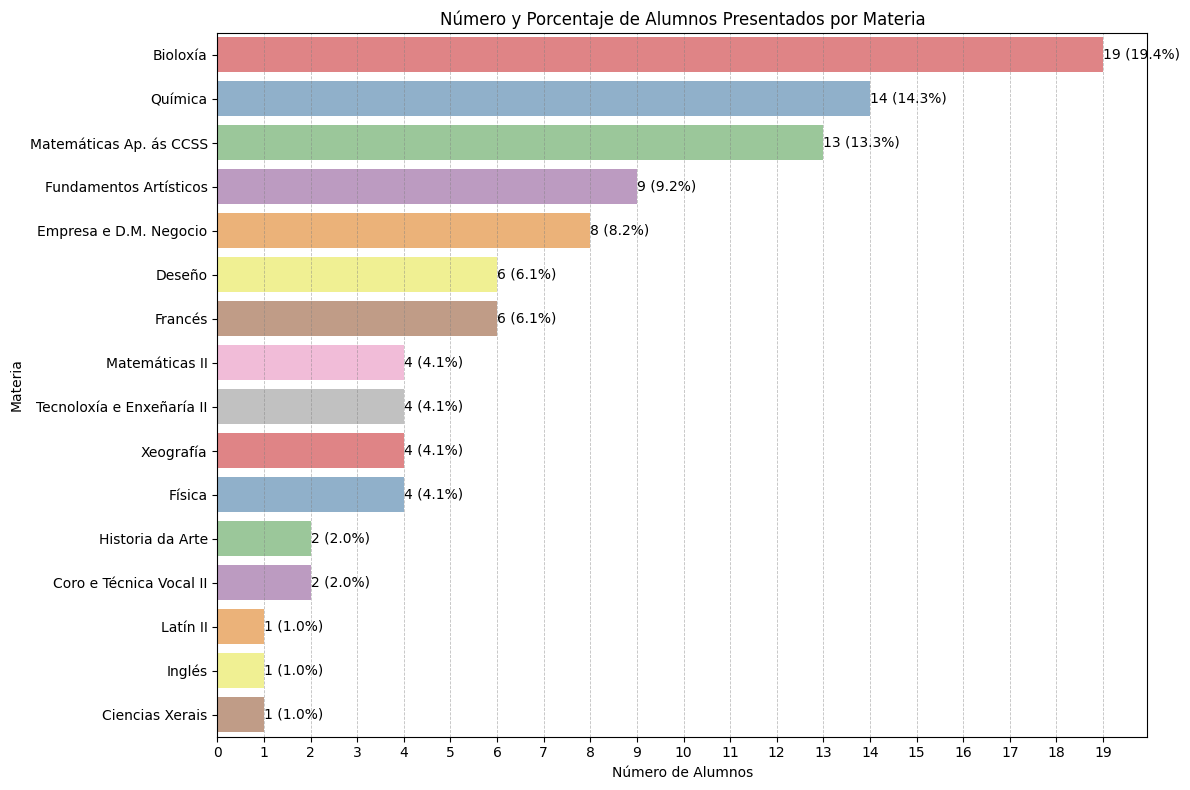

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 8))

# Usar seaborn.barplot para colorear cada barra
# Obtener los conteos y restablecer el √≠ndice para usar columnas con seaborn
counts_df = df_limpio['Materia'].value_counts().reset_index()
counts_df.columns = ['Materia', 'N√∫mero de Alumnos'] # Renombrar columnas para mayor claridad

# Calcular el total de alumnos presentados
total_alumnos = counts_df['N√∫mero de Alumnos'].sum()

# Calcular el porcentaje de alumnos por materia
counts_df['Porcentaje'] = (counts_df['N√∫mero de Alumnos'] / total_alumnos) * 100

# Ordenar el dataframe por el n√∫mero de alumnos para la visualizaci√≥n ordenada
counts_df_sorted = counts_df.sort_values(by='N√∫mero de Alumnos', ascending=False)

# Crear el gr√°fico de barras con diferentes colores por materia y ordenado por conteo
ax = sns.barplot(x='N√∫mero de Alumnos', y='Materia', hue='Materia', data=counts_df_sorted, palette='Set1', alpha=0.6, dodge=False) # Usando la paleta Set1, usando datos ordenados

plt.title('N√∫mero y Porcentaje de Alumnos Presentados por Materia')
plt.xlabel('N√∫mero de Alumnos')
plt.ylabel('Materia')

# Establecer los ticks del eje x a n√∫meros enteros
plt.xticks(np.arange(0, counts_df['N√∫mero de Alumnos'].max() + 1, 1))

# A√±adir l√≠neas verticales en cada n√∫mero entero del eje x para mejor referencia visual
for x_value in np.arange(1, counts_df['N√∫mero de Alumnos'].max() + 1, 1):
    ax.axvline(x=x_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5)

# A√±adir las etiquetas de n√∫mero de alumnos y porcentaje al final de cada barra
for index, row in counts_df_sorted.iterrows():
    ax.text(row['N√∫mero de Alumnos'], index, f'{row["N√∫mero de Alumnos"]} ({row["Porcentaje"]:.1f}%)', color='black', ha="left", va="center")


plt.tight_layout()
plt.show()

## 4. Visualizaci√≥n de los datos

### 4.1. Histogramas por materias voluntarias


Iterar sobre cada materia √∫nica y crear un histograma de las calificaciones correspondientes.


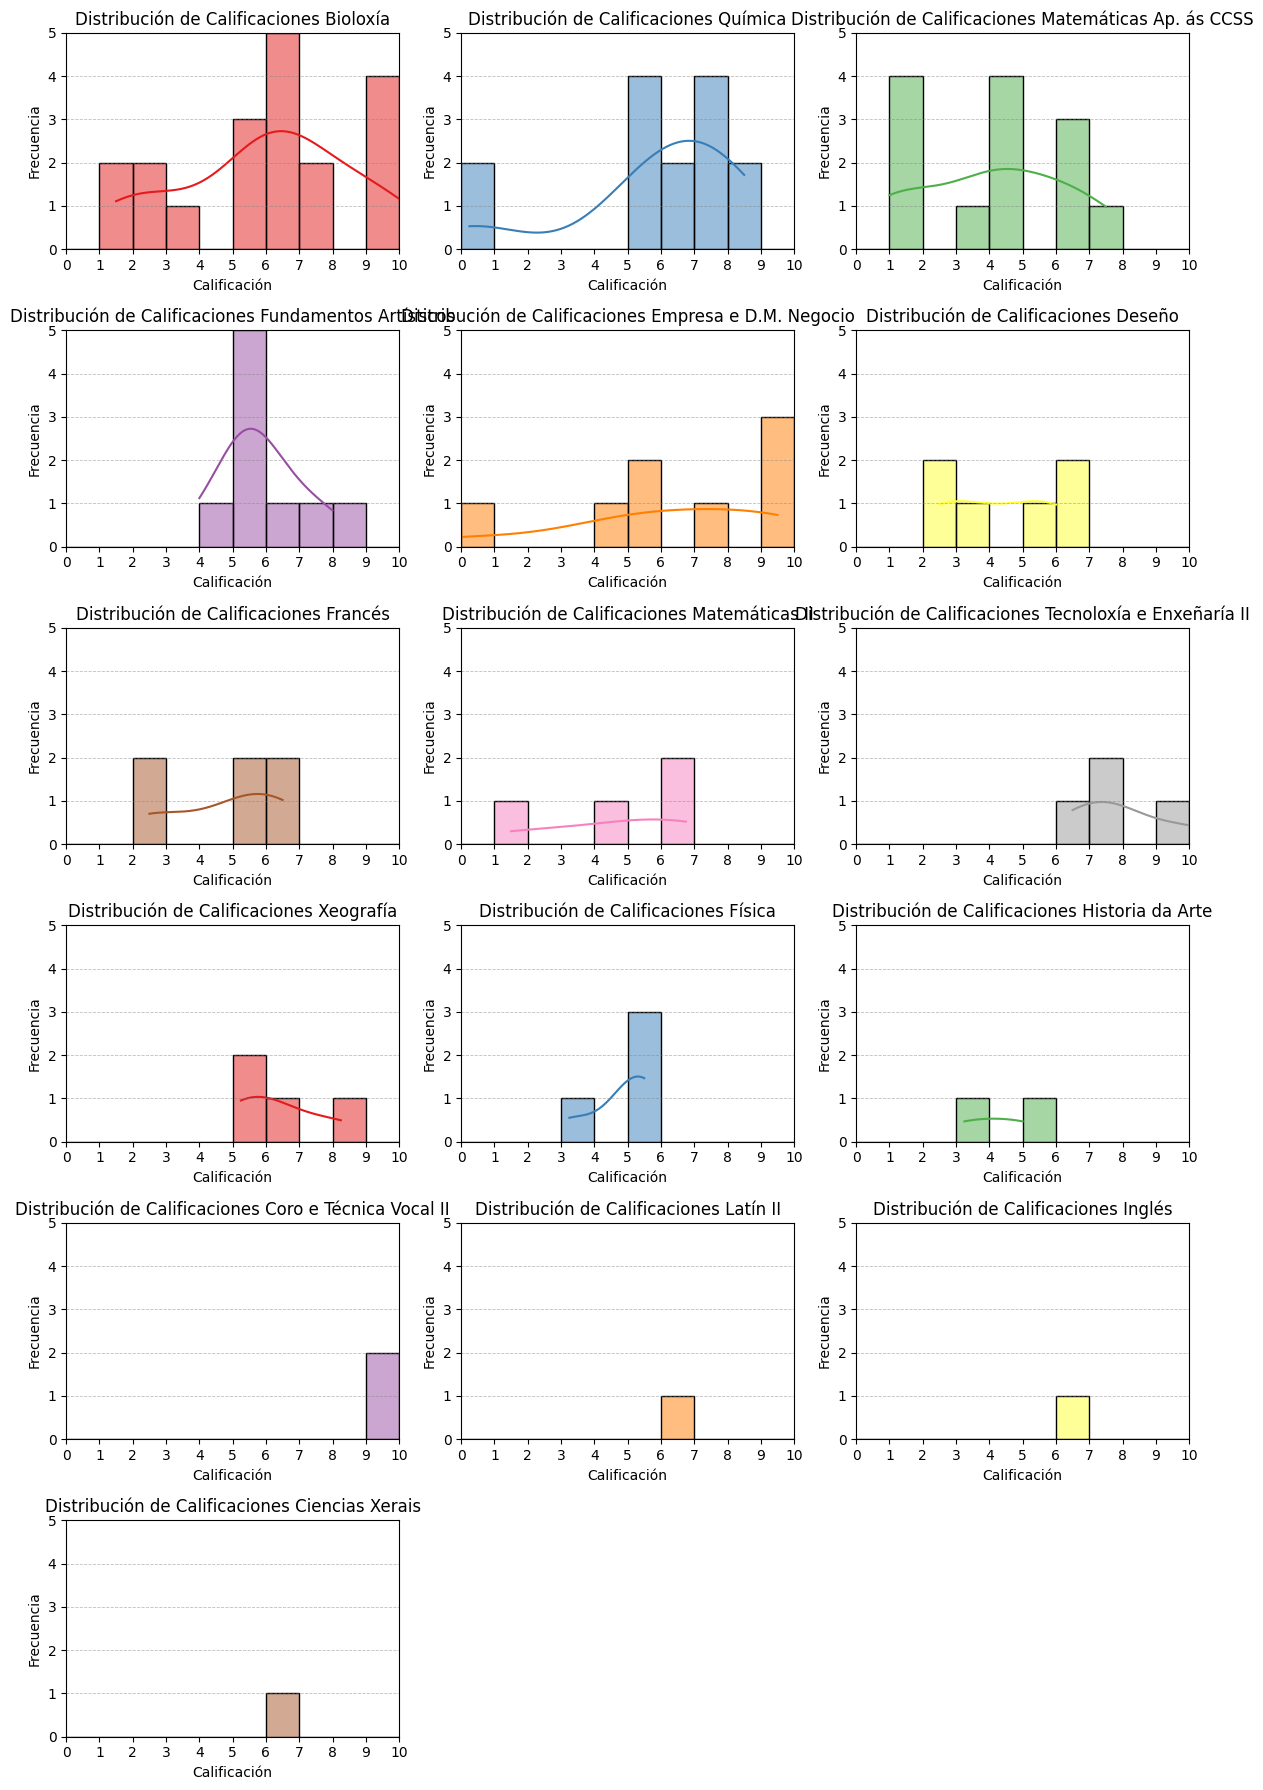

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obtener la lista de materias √∫nicas del dataframe counts_df
materias_unicas = counts_df['Materia'].unique().tolist()

# Definir una paleta de colores para los histogramas
colors = sns.color_palette('Set1', len(materias_unicas))

# Calcular el n√∫mero de filas y columnas para la cuadr√≠cula de histogramas
n_materias = len(materias_unicas)
n_cols = 3
n_rows = (n_materias + n_cols - 1) // n_cols

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
# Aplanar el array de ejes para facilitar la iteraci√≥n
axes = axes.flatten()

# Definir los bins consistentes para todos los histogramas (de 0 a 10 con pasos de 1)
consistent_bins = np.arange(0, 11, 1)

# Iterar sobre cada materia para crear un histograma
for i, materia in enumerate(materias_unicas):
    # Filtrar el dataframe para la materia actual
    df_materia = df_limpio[df_limpio['Materia'] == materia].copy()
    # Verificar si hay datos para la materia
    if not df_materia.empty:
        # Seleccionar el eje actual para el subplot
        ax = axes[i]
        # Crear el histograma de calificaciones con KDE
        sns.histplot(df_materia['Calificaci√≥n'], bins=consistent_bins, kde=True, color=colors[i], ax=ax)
        # Establecer t√≠tulo y etiquetas de los ejes
        ax.set_title(f'Distribuci√≥n de Calificaciones {materia}')
        ax.set_xlabel('Calificaci√≥n')
        ax.set_ylabel('Frecuencia')
        # Establecer los l√≠mites del eje x y los ticks
        ax.set_xlim(0, 10)
        ax.set_xticks(np.arange(0, 11, 1))
        # Establecer los l√≠mites del eje y y los ticks para que sean enteros
        ax.set_ylim(0, 5) # Ajustar si es necesario seg√∫n la frecuencia m√°xima esperada
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

        # Obtener los l√≠mites actuales del eje y y los ticks
        y_min, y_max = ax.get_ylim()
        y_ticks = ax.get_yticks()

        # A√±adir l√≠neas horizontales en cada tick del eje y para mejor referencia visual
        for y_value in y_ticks:
            if y_value >= y_min and y_value <= y_max:
                 ax.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5)

# Eliminar los ejes vac√≠os si el n√∫mero de materias es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar la superposici√≥n de t√≠tulos y etiquetas
plt.tight_layout()
# Mostrar los gr√°ficos
plt.show()

### 4.2. Box plot por materias voluntarias

Iterar sobre cada materia √∫nica y crear un box plot de las calificaciones correspondientes.

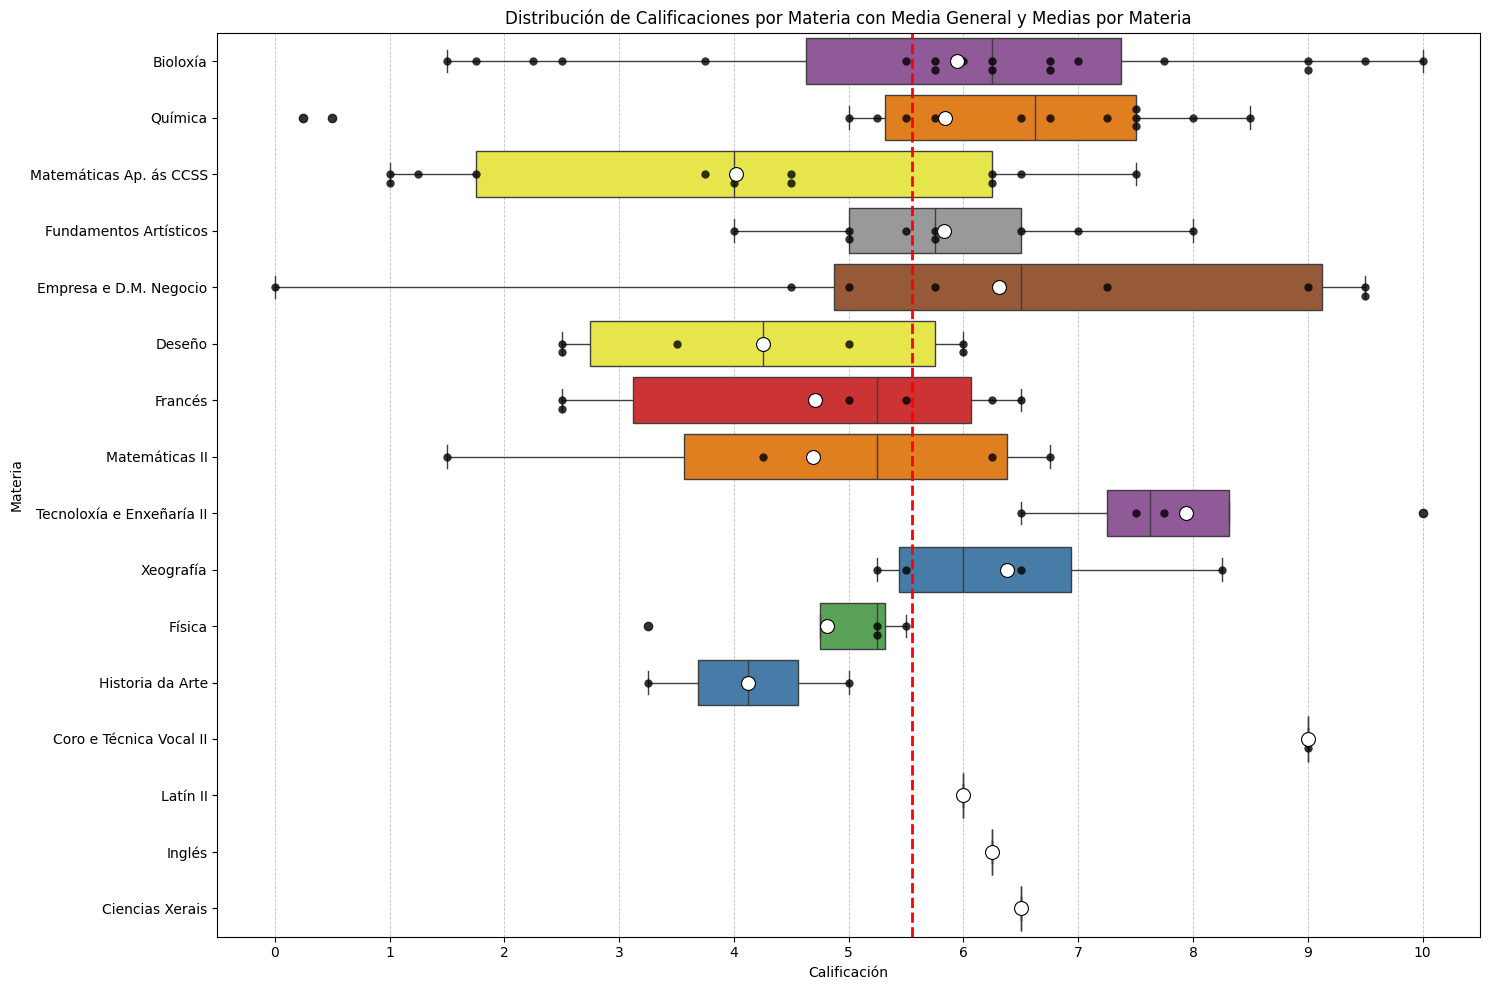

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pandas as pd

# Calcular la media general de calificaciones
overall_mean_qualification = df_limpio['Calificaci√≥n'].mean()

# Calcular la media de calificaciones por materia
mean_qualifications_by_subject = df_limpio.groupby('Materia')['Calificaci√≥n'].mean().reset_index()

# Asegurarse de que counts_df_sorted est√© disponible de pasos anteriores
# Si no est√° disponible, calcularlo (esto puede ser redundante si se ejecutan las celdas en orden)
if 'counts_df_sorted' not in locals() or counts_df_sorted is None:
    counts_df = df_limpio['Materia'].value_counts().reset_index()
    counts_df.columns = ['Materia', 'N√∫mero de Alumnos']
    counts_df_sorted = counts_df.sort_values(by='N√∫mero de Alumnos', ascending=False)

# Definir el orden de las materias basado en el n√∫mero de alumnos presentados
subject_order = counts_df_sorted['Materia'].tolist()

# Ordenar el DataFrame de medias por materia seg√∫n el orden definido
mean_qualifications_by_subject_ordered = mean_qualifications_by_subject.set_index('Materia').loc[subject_order].reset_index()

# Definir la paleta de colores para los boxplots
subject_palette = sns.color_palette('Set1', len(subject_order))

# Crear la figura y los ejes para el boxplot
plt.figure(figsize=(15, 10))
# Crear el boxplot de calificaciones por materia, ordenado y con colores (Horizontal)
ax = sns.boxplot(data=df_limpio, x='Calificaci√≥n', y='Materia', hue='Materia',palette='Set1', order=subject_order)
# Establecer t√≠tulo y etiquetas de los ejes
plt.title('Distribuci√≥n de Calificaciones por Materia con Media General y Medias por Materia')
plt.xlabel('Calificaci√≥n')
plt.ylabel('Materia')
# Establecer los l√≠mites del eje x y los ticks (invertidos para horizontal)
plt.xlim(-0.5, 10.5)
plt.xticks(np.arange(0, 11, 1))
# Ajustar el layout
plt.tight_layout()

# A√±adir una l√≠nea vertical para la media general (invertida para horizontal)
mean_line = ax.axvline(overall_mean_qualification, color='red', linestyle='--', linewidth=2, label=f'Media General: {overall_mean_qualification:.2f}')

# A√±adir puntos para las medias por materia en el boxplot (invertidos para horizontal)
sns.scatterplot(data=mean_qualifications_by_subject_ordered, x='Calificaci√≥n', y='Materia', color='white', edgecolor='black', s=100, ax=ax, zorder=5, label='Media por Materia')

# A√±adir un swarmplot para mostrar las calificaciones individuales (jittered points) (invertidos para horizontal)
sns.swarmplot(data=df_limpio, x='Calificaci√≥n', y='Materia', color='black', size=6, ax=ax, alpha=0.8, order=subject_order, label='Calificaci√≥n Individual')

# A√±adir l√≠neas verticales en cada n√∫mero entero del eje x para mejor referencia visual (invertidas para horizontal)
for x_value in np.arange(0, 11, 1):
    ax.axvline(x=x_value, color='grey', linestyle='--', linewidth=0.6, alpha=0.5, zorder=0) # A√±adir zorder para asegurar que las l√≠neas est√©n detr√°s de los puntos

# Intentar eliminar la leyenda duplicada si existe
try:
    ax.get_legend().remove()
except:
    pass

# Mostrar el gr√°fico
plt.show()

## 5. Conclusiones

# 5. Conclusiones

Este estudio parte de los datos de calificaciones num√©ricas obtenidas en materias optativas por parte del alumnado, procesadas y visualizadas mediante histogramas y box plots. Se incluye adem√°s el n√∫mero de calificaciones registradas por materia (n), lo cual es esencial para:
- Valorar la representatividad de los datos.
- Aportar solidez a las interpretaciones estad√≠sticas.
- Detectar posibles sesgos derivados de muestras reducidas.

## 5.1. üìä Distribuci√≥n del n√∫mero de calificaciones por materia

Se presenta la tabla ordenada por la columna "n (n¬∫ de calificaci√≥ns)" de mayor a menor:

| Materia | n (n¬∫ de calificaci√≥ns) | Porcentaje |
|---|---|---|
| Biolox√≠a | 19 | 18.8% |
| Qu√≠mica | 14 | 13.9% |
| Matem√°ticas Aplicadas √°s CCSS | 13 | 12.9% |
| Fundamentos Art√≠sticos | 9 | 8.9% |
| Empresa e D.M. Negocio | 8 | 7.9% |
| Franc√©s | 6 | 5.9% |
| Dese√±o | 6 | 5.9% |
| Xeograf√≠a | 4 | 4.0% |
| F√≠sica | 4 | 4.0% |
| Matem√°ticas II | 4 | 4.0% |
| Tecnolox√≠a e Enxe√±ar√≠a II | 4 | 4.0% |
| Historia da Arte | 2 | 2.0% |
| Coro e T√©cnica Vocal II | 2 | 2.0% |
| Ciencias Xerais | 1 | 1.0% |
| Ingl√©s | 1 | 1.0% |
| Lat√≠n II | 1 | 1.0% |
| **Total** | **101** | **100%** |

Se observa una variabilidad notable no tama√±o de mostra por materia. Algunhas, como Biolox√≠a, Qu√≠mica ou Matem√°ticas Aplicadas √°s CCSS, contan con datos suficientes para conclusi√≥ns razoablemente s√≥lidas. En cambio, materias como Lat√≠n II, Ingl√©s ou Ciencias Xerais te√±en s√≥ 1 alumno/a, polo que non se poden extraer conclusi√≥ns representativas.

## 5.2. üîç An√°lisis estad√≠stico detallado por materia

### üß™ Biolox√≠a (n = 19)
- **Media:** 5.95 | **Mediana:** 6.25 | **Desviaci√≥n est√°ndar:** 2.60
- **Rango:** 1.5 - 10.0
- **Distribuci√≥n:** Ampla dispersi√≥n con calificaciones distribuidas principalmente entre 4-8 puntos
- **Conclusi√≥n:** Materia con rendemento medio pero gran diversidade de perf√≠s no alumnado. La distribuci√≥n muestra que la mayor√≠a del alumnado est√° pr√≥ximo al aprobado, pero hay casos extremos tanto de bajo como de alto rendimiento.

### üß≤ Qu√≠mica (n = 14)
- **Media:** 5.84 | **Mediana:** 6.63 | **Desviaci√≥n est√°ndar:** 2.54
- **Rango:** 0.25 - 8.5
- **Distribuci√≥n:** Distribuci√≥n bimodal con concentraci√≥n en torno a 5.5-7.5 y algunos casos de suspensos muy bajos
- **Conclusi√≥n:** Materia esixente con resultados polarizados. H√° alumnado que destaca pero tam√©n casos de rendemento moi baixo. A mediana superior √° media indica que existen valores extremos baixos que afectan √° media.

### üßÆ Matem√°ticas Aplicadas √°s CCSS (n = 13)
- **Media:** 4.02 | **Mediana:** 4.0 | **Desviaci√≥n est√°ndar:** 2.23
- **Rango:** 1.0 - 7.5
- **Distribuci√≥n:** Distribuci√≥n relativamente uniforme con alta concentraci√≥n de suspensos (por debajo de 5)
- **Conclusi√≥n:** Materia con rendemento preocupante. M√°is da metade do alumnado non supera o aprobado. Necesaria revisi√≥n metodol√≥xica e reforzo acad√©mico.

### üßëüé® Fundamentos Art√≠sticos (n = 9)
- **Media:** 5.83 | **Mediana:** 5.75 | **Desviaci√≥n est√°ndar:** 1.19
- **Rango:** 4.0 - 8.0
- **Distribuci√≥n:** Distribuci√≥n normal con baixa dispersi√≥n, concentrada entre 5-7 puntos
- **Conclusi√≥n:** Materia estable con rendemento medio-alto. A baixa dispersi√≥n indica homoxeneidade nos resultados, favorecendo perf√≠s creativos.

### üßëüíº Empresa e D.M. Negocio (n = 8)
- **Media:** 6.31 | **Mediana:** 6.5 | **Desviaci√≥n est√°ndar:** 3.24
- **Rango:** 0.0 - 9.5
- **Distribuci√≥n:** Alta dispersi√≥n con casos extremos (0 e 9.5), pero mediana alta
- **Conclusi√≥n:** Materia con resultados polarizados. Hai alumnado moi motivado (notas altas) pero tam√©n alg√∫n caso de abandono ou desinterese total.

### üó£Ô∏è Franc√©s (n = 6)
- **Media:** 4.71 | **Mediana:** 5.25 | **Desviaci√≥n est√°ndar:** 1.79
- **Rango:** 2.5 - 6.5
- **Distribuci√≥n:** Distribuci√≥n sesgada cara a calificaci√≥ns baixas, con mediana pr√≥xima ao aprobado
- **Conclusi√≥n:** Materia con rendemento irregular. A maior√≠a do alumnado est√° no l√≠mite do aprobado, indicando dificultades na aprendizaxe do idioma.

### üßëüé® Dese√±o (n = 6)
- **Media:** 4.25 | **Mediana:** 4.25 | **Desviaci√≥n est√°ndar:** 1.64
- **Rango:** 2.5 - 6.0
- **Distribuci√≥n:** Distribuci√≥n equilibrada pero con tendencia a calificaci√≥ns baixas
- **Conclusi√≥n:** Materia con rendemento baixo xeneralizado. Posible falta de axuste entre perfil do alumnado e contidos da materia.

### üåç Xeograf√≠a (n = 4)
- **Media:** 6.38 | **Mediana:** 6.0 | **Desviaci√≥n est√°ndar:** 1.36
- **Rango:** 5.25 - 8.25
- **Distribuci√≥n:** Distribuci√≥n compacta con todas as calificaci√≥ns por riba do aprobado
- **Conclusi√≥n:** Materia con rendemento alto e homox√©neo. O alumnado que a elixe est√° ben preparado ou motivado.

### üß≤ F√≠sica (n = 4)
- **Media:** 4.81 | **Mediana:** 5.25 | **Desviaci√≥n est√°ndar:** 1.05
- **Rango:** 3.25 - 5.5
- **Distribuci√≥n:** Distribuci√≥n concentrada en torno ao aprobado pero con tendencia baixa
- **Conclusi√≥n:** Materia con rendemento baixo pero estable. Todas as calificaci√≥ns est√°n pr√≥ximas ao aprobado, indicando dificultade xeneralizada.

### üßÆ Matem√°ticas II (n = 4)
- **Media:** 4.69 | **Mediana:** 5.25 | **Desviaci√≥n est√°ndar:** 2.38
- **Rango:** 1.5 - 6.75
- **Distribuci√≥n:** Alta dispersi√≥n con casos extremos
- **Conclusi√≥n:** Materia con rendemento irregular. A alta dispersi√≥n indica perf√≠s moi diversos de alumnado.

### üßëüíª Tecnolox√≠a e Enxe√±ar√≠a II (n = 4)
- **Media:** 7.94 | **Mediana:** 7.63 | **Desviaci√≥n est√°ndar:** 1.48
- **Rango:** 6.5 - 10.0
- **Distribuci√≥n:** Distribuci√≥n alta e homox√©nea, sen suspensos
- **Conclusi√≥n:** Materia con rendemento excelente. O alumnado que a elixe est√° ben preparado e motivado.

### üé≠ Historia da Arte (n = 2)
- **Media:** 4.13 | **Mediana:** 4.13 | **Desviaci√≥n est√°ndar:** 1.24
- **Rango:** 3.25 - 5.0
- **Distribuci√≥n:** Mostra insuficiente para conclusi√≥ns s√≥lidas
- **Conclusi√≥n:** Datos insuficientes. Tendencia a calificaci√≥ns baixas pero sen significaci√≥n estat√≠stica.

### üéµ Coro e T√©cnica Vocal II (n = 2)
- **Media:** 9.0 | **Mediana:** 9.0 | **Desviaci√≥n est√°ndar:** 0.0
- **Rango:** 9.0 - 9.0
- **Distribuci√≥n:** Ambos casos con calificaci√≥n de 9
- **Conclusi√≥n:** Rendemento excelente pero mostra insuficiente. O alumnado que elixe esta materia est√° moi especializado.

### üìö Materias con n = 1
- **Ciencias Xerais:** 6.5
- **Ingl√©s:** 6.25
- **Lat√≠n II:** 6.0
- **Conclusi√≥n:** Datos insuficientes para an√°lise estat√≠stica. Todas as calificaci√≥ns est√°n pr√≥ximas ao aprobado.

## 5.3. üìä Comparativa de resultados por materia

| Materia | Media | Mediana | Desv. Est√°ndar | Rendemento |
|---------|-------|---------|----------------|-------------|
| Coro e T√©cnica Vocal II | 9.00 | 9.00 | 0.00 | Excelente |
| Tecnolox√≠a e Enxe√±ar√≠a II | 7.94 | 7.63 | 1.48 | Excelente |
| Ciencias Xerais | 6.50 | 6.50 | - | Alto* |
| Xeograf√≠a | 6.38 | 6.00 | 1.36 | Alto |
| Empresa e D.M. Negocio | 6.31 | 6.50 | 3.24 | Medio-alto |
| Ingl√©s | 6.25 | 6.25 | - | Alto* |
| Lat√≠n II | 6.00 | 6.00 | - | Alto* |
| Biolox√≠a | 5.95 | 6.25 | 2.60 | Medio |
| Qu√≠mica | 5.84 | 6.63 | 2.54 | Medio |
| Fundamentos Art√≠sticos | 5.83 | 5.75 | 1.19 | Medio |
| F√≠sica | 4.81 | 5.25 | 1.05 | Baixo |
| Franc√©s | 4.71 | 5.25 | 1.79 | Baixo |
| Matem√°ticas II | 4.69 | 5.25 | 2.38 | Baixo |
| Dese√±o | 4.25 | 4.25 | 1.64 | Baixo |
| Historia da Arte | 4.13 | 4.13 | 1.24 | Baixo* |
| Matem√°ticas Ap. √°s CCSS | 4.02 | 4.00 | 2.23 | Baixo |

*Materias con mostra insuficiente (n ‚â§ 2)

## 5.4. üìå Consideraci√≥ns xerais

### Materias con mellor rendemento
- **Tecnolox√≠a e Enxe√±ar√≠a II** e **Coro e T√©cnica Vocal II** destacan con excelentes resultados
- **Xeograf√≠a** presenta rendemento alto e homox√©neo
- O alumnado que elixe estas materias est√° ben preparado ou moi motivado

### Materias con rendemento preocupante
- **Matem√°ticas Aplicadas √°s CCSS** require atenci√≥n urxente (m√°is da metade de suspensos)
- **Dese√±o**, **F√≠sica**, **Franc√©s** e **Matem√°ticas II** mostran rendemento baixo xeneralizado
- **Historia da Arte** presenta tendencia preocupante (a√≠nda que con mostra pequena)

### Materias con alta dispersi√≥n
- **Empresa e D.M. Negocio** presenta maior dispersi√≥n (œÉ = 3.24), indicando perf√≠s moi diversos
- **Biolox√≠a** e **Qu√≠mica** mostran dispersi√≥n significativa, requirindo atenci√≥n individualizada

## 5.5. üìé Recomendaci√≥ns

### Inmediatas
1. **Reforzar o acompa√±amento** en Matem√°ticas Aplicadas √°s CCSS mediante titor√≠as espec√≠ficas
2. **Revisar metodolox√≠a** en F√≠sica, Dese√±o e Franc√©s
3. **Analizar causas** da alta dispersi√≥n en Empresa e D.M. Negocio

### A medio prazo
1. **Fomentar boas pr√°cticas** detectadas en Tecnolox√≠a e Enxe√±ar√≠a II e Xeograf√≠a
2. **Implementar apoio individualizado** en materias con alta dispersi√≥n
3. **Revisar criterios de acceso** ou preparaci√≥n previa para materias con rendemento baixo

### De seguimento
1. **Analizar conxuntamente** co profesorado os resultados para detectar factores contextuais
2. **Manter un seguimento anual** para observar evoluci√≥ns e impacto das medidas
3. **Ampliar mostras** nas materias con n baixo para ter conclusi√≥ns m√°is s√≥lidas

### Consideraci√≥ns especiais
- As materias con n ‚â§ 2 requiren maior seguimento antes de extraer conclusi√≥ns definitivas
- A correlaci√≥n entre n√∫mero de alumnos e rendemento debe ser analizada m√°is profundamente
- √â necesario considerar o perfil espec√≠fico do alumnado que elixe cada materia optativa